In [0]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import tree
from sklearn.impute import SimpleImputer
import numpy
import pandas as panda
from sklearn.model_selection import train_test_split
import graphviz
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
##########
# TASK 1 #
##########
column_names = ['age', 'workclass', 'education', 'marital-status', 
            'occupation', 'relationship', 'race', 'sex', 'capital-gain', 
            'capital-loss', 'hours-per-week', 'native-country', '50k']

trainDataFrame = panda.read_csv("adult_train.txt", names = column_names)
testDataFrame = panda.read_csv("adult_test.txt", header = None, na_values= " ?").copy()

testDataFrame.columns = column_names

trainWorkclassMode = trainDataFrame["workclass"].mode()
trainOccupationMode = trainDataFrame["occupation"].mode()
trainNativeCountryMode = trainDataFrame["native-country"].mode()

trainDataFrame["workclass"].fillna(trainWorkclassMode, inplace = True)
trainDataFrame["occupation"].fillna(trainOccupationMode, inplace = True)
trainDataFrame["native-country"].fillna(trainNativeCountryMode, inplace = True)

trainDataFrame.to_csv("goodTrainDataFrame.csv")

In [0]:
##########
# TASK 2 #
##########
test_col = len(trainDataFrame.columns)
non_dummy_cols = ["50k"]
dummy_cols = list(set(trainDataFrame.columns) - set(non_dummy_cols))

binaryTrainDF = panda.get_dummies(trainDataFrame, columns = dummy_cols)

binaryTrainDF.to_csv("binaryTrainDF.csv")

In [7]:
binaryTrainDF

,50k,hours-per-week_1,hours-per-week_2,hours-per-week_3,hours-per-week_4,hours-per-week_5,hours-per-week_6,hours-per-week_7,hours-per-week_8,hours-per-week_9,hours-per-week_10,hours-per-week_11,hours-per-week_12,hours-per-week_13,hours-per-week_14,hours-per-week_15,hours-per-week_16,hours-per-week_17,hours-per-week_18,hours-per-week_19,hours-per-week_20,hours-per-week_21,hours-per-week_22,hours-per-week_23,hours-per-week_24,hours-per-week_25,hours-per-week_26,hours-per-week_27,hours-per-week_28,hours-per-week_29,hours-per-week_30,hours-per-week_31,hours-per-week_32,hours-per-week_33,hours-per-week_34,hours-per-week_35,hours-per-week_36,hours-per-week_37,hours-per-week_38,hours-per-week_39,...,capital-gain_18481,capital-gain_20051,capital-gain_22040,capital-gain_25124,capital-gain_25236,capital-gain_27828,capital-gain_34095,capital-gain_41310,capital-gain_99999,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,<=50K,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,<=50K,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,<=50K,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,<=50K,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,<=50K,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,<=50K,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
32557,>50K,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
32558,<=50K,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
32559,<=50K,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
x = binaryTrainDF.drop(columns="50k").values
y = binaryTrainDF["50k"]

trainDataFrame.to_csv("binaryTrainDF.csv")

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.70, test_size = 0.30, random_state = 85)

In [0]:
##########
# TASK 3 #
##########
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

max_depth = range(1, 31)
min_leaf = range(1, 51)

max_depth_array_train = []
max_depth_array_test = []

min_leaf_array_train = []
min_leaf_array_test = []

maxDepthAccuracyTrain = []
maxDepthAccuracyTest = []

minLeafAccuracyTrain = []
minLeafAccuracyTest = []

for i in max_depth:
    max_depth_array_train.append(i)
    maxDepth = tree.DecisionTreeClassifier(max_depth = i, random_state = 85)
    maxDepth.fit(X_train, y_train) 
    maxDepthAccuracyTrain.append(maxDepth.score(X_train, y_train))

for i in max_depth:
    max_depth_array_test.append(i)
    maxDepth = tree.DecisionTreeClassifier(max_depth = i, random_state = 85)
    maxDepth.fit(X_test, y_test) 
    maxDepthAccuracyTest.append(maxDepth.score(X_test, y_test))



In [0]:
for i in min_leaf:
    min_leaf_array_train.append(i)
    minLeaf = tree.DecisionTreeClassifier(min_samples_leaf = i, random_state = 85)
    minLeaf.fit(X_train, y_train) 
    minLeafAccuracyTrain.append(minLeaf.score(X_train, y_train))

for i in min_leaf:
    min_leaf_array_test.append(i)
    minLeaf = tree.DecisionTreeClassifier(min_samples_leaf= i, random_state = 85)
    minLeaf.fit(X_train, y_train) 
    minLeafAccuracyTest.append(minLeaf.score(X_test, y_test))

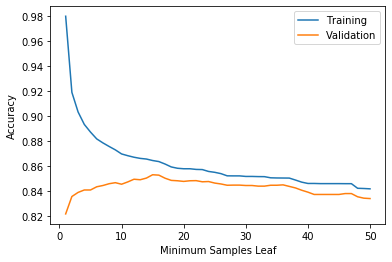

In [31]:
plt.plot(min_leaf, minLeafAccuracyTrain, label='Training')
plt.plot(min_leaf, minLeafAccuracyTest, label='Validation')

plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.xlabel('Minimum Samples Leaf')
plt.show()

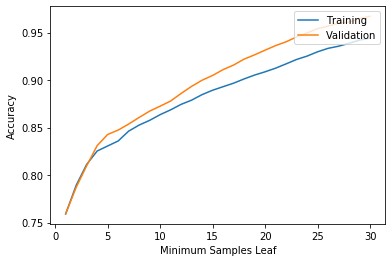

In [32]:
plt.plot(max_depth, maxDepthAccuracyTrain, label='Training')
plt.plot(max_depth, maxDepthAccuracyTest, label='Validation')

plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.xlabel('Minimum Samples Leaf')
plt.show()

In [37]:
t = tree.DecisionTreeClassifier(
    class_weight=None, 
    criterion='gini', 
    max_depth=30,
    max_features=None, 
    max_leaf_nodes=None, 
    min_samples_leaf=50,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    presort=False, 
    random_state=85, 
    splitter='best')

t.fit(X_train, y_train)

dot_data = StringIO()

export_graphviz(t, out_file=dot_data, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('t.png')
#Image(graph.create_png())

True

In [40]:
##########
# TASK 4 #
##########
clf = RandomForestClassifier()
clf = clf.fit(X_train,y_train)

max_depth = range(1, 31)
min_leaf = range(1, 51)

max_depth_array_train = []
max_depth_array_test = []

min_leaf_array_train = []
min_leaf_array_test = []

maxDepthAccuracyTrain = []
maxDepthAccuracyTest = []

minLeafAccuracyTrain = []
minLeafAccuracyTest = []

for i in max_depth:
    max_depth_array_train.append(i)
    maxDepth = RandomForestClassifier(max_depth = i, random_state = 85)
    maxDepth.fit(X_train, y_train.ravel()) 
    maxDepthAccuracyTrain.append(maxDepth.score(X_train, y_train))

for i in max_depth:
    max_depth_array_test.append(i)
    maxDepth = RandomForestClassifier(max_depth = i, random_state = 85)
    maxDepth.fit(X_test, y_test.ravel()) 
    maxDepthAccuracyTest.append(maxDepth.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

In [43]:
for i in min_leaf:
    min_leaf_array_train.append(i)
    minLeaf = RandomForestClassifier(min_samples_leaf = i, random_state = 85)
    minLeaf.fit(X_train, y_train.ravel()) 
    minLeafAccuracyTrain.append(minLeaf.score(X_train, y_train))

for i in min_leaf:
    min_leaf_array_test.append(i)
    minLeaf = RandomForestClassifier(min_samples_leaf= i, random_state = 85)
    minLeaf.fit(X_train, y_train.ravel()) 
    minLeafAccuracyTest.append(minLeaf.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

ValueError: ignored

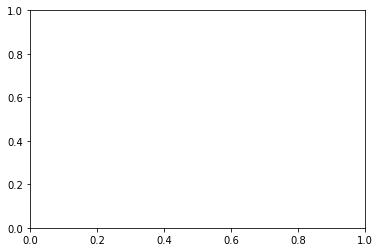

In [42]:
plt.plot(min_leaf, minLeafAccuracyTrain, label='Training')
plt.plot(min_leaf, minLeafAccuracyTest, label='Validation')

plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.xlabel('Minimum Samples Leaf')
plt.show()

In [0]:
plt.plot(max_depth, maxDepthAccuracyTrain, label='Training')
plt.plot(max_depth, maxDepthAccuracyTest, label='Validation')

plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.xlabel('Minimum Samples Leaf')
plt.show()

In [0]:
t = RandomForestClassifier(
    class_weight=None, 
    criterion='gini', 
    max_depth=30,
    max_features=None, 
    max_leaf_nodes=None, 
    min_samples_leaf=50,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    presort=False, 
    random_state=85, 
    splitter='best')

t.fit(X_train, y_train)

dot_data = StringIO()

export_graphviz(t, out_file=dot_data, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('t.png')
#Image(graph.create_png())